**Load the dataset and perform EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('/content/pet_adoption_data.csv')

In [4]:
# Display the first few rows of the dataset
print(data.head())

   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   AdoptionLikelihood  
0                   0  
1       

In [5]:
# Basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB
None


In [6]:
# Statistical summary of the dataset
print(data.describe())

             PetID    AgeMonths     WeightKg   Vaccinated  HealthCondition  \
count  2007.000000  2007.000000  2007.000000  2007.000000      2007.000000   
mean   1503.000000    92.279522    15.705776     0.701046         0.196313   
std     579.515315    52.148363     8.327749     0.457914         0.397307   
min     500.000000     1.000000     1.018198     0.000000         0.000000   
25%    1001.500000    48.000000     8.730396     0.000000         0.000000   
50%    1503.000000    94.000000    15.925416     1.000000         0.000000   
75%    2004.500000   138.000000    22.737180     1.000000         0.000000   
max    2506.000000   179.000000    29.995628     1.000000         1.000000   

       TimeInShelterDays  AdoptionFee  PreviousOwner  AdoptionLikelihood  
count        2007.000000  2007.000000    2007.000000         2007.000000  
mean           43.974091   249.142003       0.301943            0.328351  
std            25.740253   142.887040       0.459215            0.469730

In [7]:
# Checking for missing values
print(data.isnull().sum())

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64


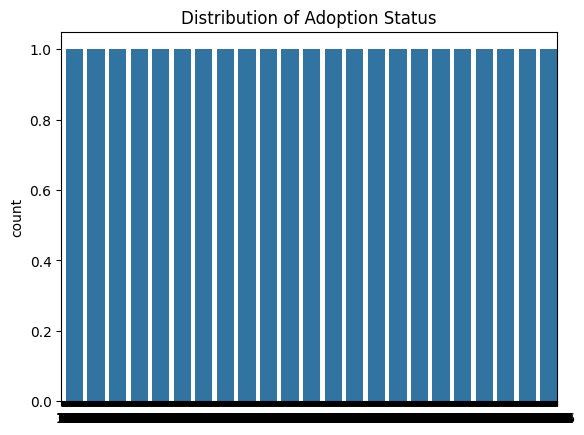

In [9]:
# Visualize the distribution of target variable
sns.countplot(data['AdoptionLikelihood'])
plt.title('Distribution of Adoption Status')
plt.show()

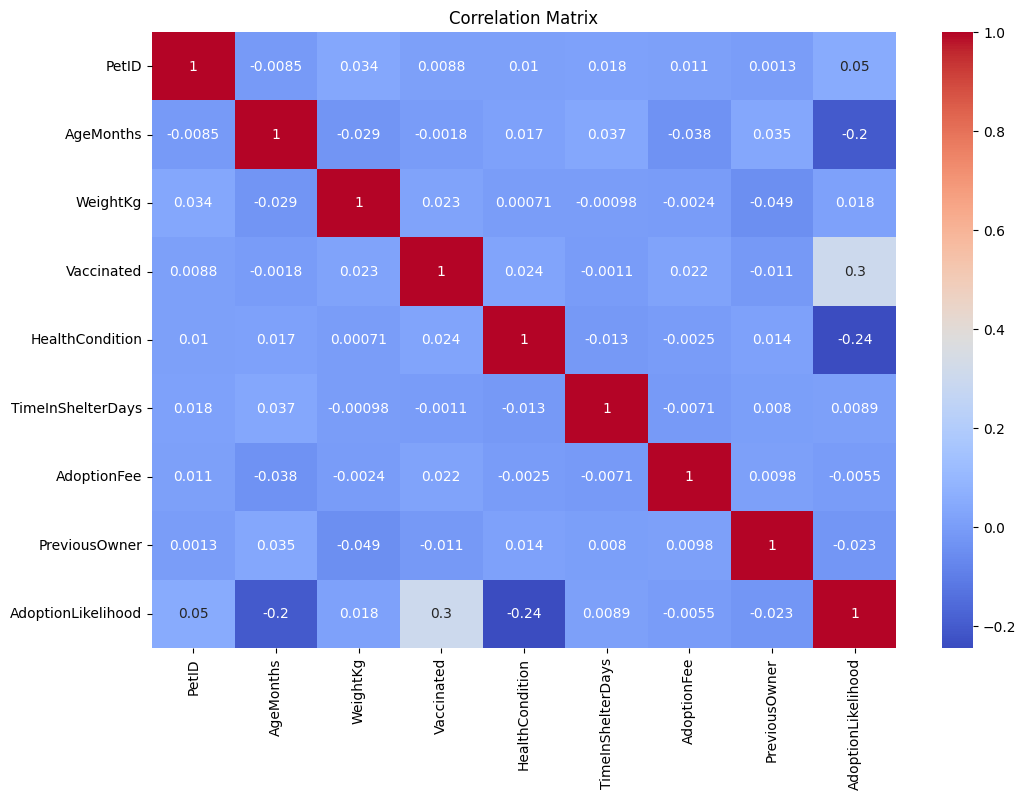

In [11]:
# Handle non-numerical columns before calculating correlations
# Select only numerical columns or convert relevant columns to numerical types
numerical_data = data.select_dtypes(include=['number'])

# Visualize correlation matrix
corr_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Data Preprocessing and Splitting Data**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [13]:
# Handle categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [14]:
# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

In [17]:
# Define features and target
X = data.drop('AdoptionLikelihood', axis=1)
y = data['AdoptionLikelihood']

In [18]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Training, Evaluation, and Prediction**

**LSTM**

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
# Reshape data for LSTM model
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [22]:
# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[1])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

In [23]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
41/41 [==============================] - 9s 32ms/step - loss: 0.6723 - accuracy: 0.6737 - val_loss: 0.6447 - val_accuracy: 0.6978
Epoch 2/20
41/41 [==============================] - 0s 6ms/step - loss: 0.6048 - accuracy: 0.7118 - val_loss: 0.5514 - val_accuracy: 0.7227
Epoch 3/20
41/41 [==============================] - 0s 6ms/step - loss: 0.5226 - accuracy: 0.7391 - val_loss: 0.4942 - val_accuracy: 0.7477
Epoch 4/20
41/41 [==============================] - 0s 7ms/step - loss: 0.4970 - accuracy: 0.7547 - val_loss: 0.4796 - val_accuracy: 0.7601
Epoch 5/20
41/41 [==============================] - 0s 9ms/step - loss: 0.4906 - accuracy: 0.7375 - val_loss: 0.4715 - val_accuracy: 0.7850
Epoch 6/20
41/41 [==============================] - 0s 8ms/step - loss: 0.4807 - accuracy: 0.7570 - val_loss: 0.4680 - val_accuracy: 0.7850
Epoch 7/20
41/41 [==============================] - 0s 8ms/step - loss: 0.4675 - accuracy: 0.7625 - val_loss: 0.4572 - val_accuracy: 0.7882
Epoch 8/20
41/41 [=

In [24]:
# Predictions
y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype("int32")

13/13 [==============================] - 2s 8ms/step


In [25]:
# Evaluation
print("LSTM Model Accuracy:", accuracy_score(y_test, y_pred_lstm))
print(confusion_matrix(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))

LSTM Model Accuracy: 0.8781094527363185
[[247  23]
 [ 26 106]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       270
           1       0.82      0.80      0.81       132

    accuracy                           0.88       402
   macro avg       0.86      0.86      0.86       402
weighted avg       0.88      0.88      0.88       402



**KNN**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
# Predictions
y_pred_knn = knn.predict(X_test)

In [29]:
# Evaluation
print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Model Accuracy: 0.7587064676616916
[[221  49]
 [ 48  84]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       270
           1       0.63      0.64      0.63       132

    accuracy                           0.76       402
   macro avg       0.73      0.73      0.73       402
weighted avg       0.76      0.76      0.76       402



**K-Means Clustering**

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [32]:
# Cluster labels for training set
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

In [33]:
# Evaluation
print("K-Means Silhouette Score:", silhouette_score(X_test, test_clusters))

K-Means Silhouette Score: 0.09654303048720678


**XGBoost**

In [34]:
import xgboost as xgb
from xgboost import XGBClassifier

In [35]:
# XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)

In [37]:
# Evaluation
print("XGBoost Model Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Model Accuracy: 0.9502487562189055
[[259  11]
 [  9 123]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       270
           1       0.92      0.93      0.92       132

    accuracy                           0.95       402
   macro avg       0.94      0.95      0.94       402
weighted avg       0.95      0.95      0.95       402



**Visualize Results**

In [38]:
# Function to plot stock analysis chart (for demonstration purposes, using feature importance in this case)
def plot_feature_importance(model, X):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    plt.figure(figsize=(12, 8))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(X.columns)[sorted_idx])
    plt.title('Feature Importance')
    plt.show()

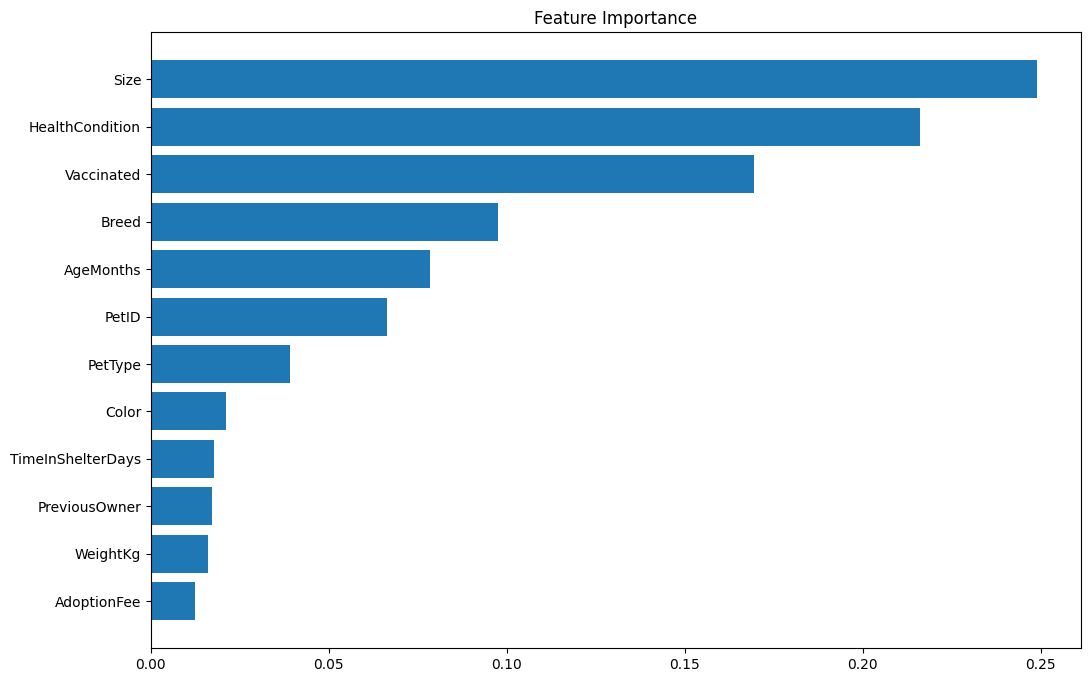

In [39]:
# Plot feature importance for XGBoost
plot_feature_importance(xgb_model, X)